# SpaceX Falcon 9 First Stage Landing Prediction

## Exploratory Data Analysis (EDA), and Feature Engineering using Pandas, and Data Visualization using Matplotlib and Seaborn

* Perform EDA and Feature Engineering using Pandas.
* Perform Data Visualization using Matplotlib and Seaborn.

### Importing Libraries and Defining Auxiliary Functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Exploratory Data Analysis

In [2]:
df = pd.read_csv('dataset_part_2.csv')
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and Payload variables would affect the launch outcome.

We can plot out the `FlightNumber` vs. `PayloadMass` and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.

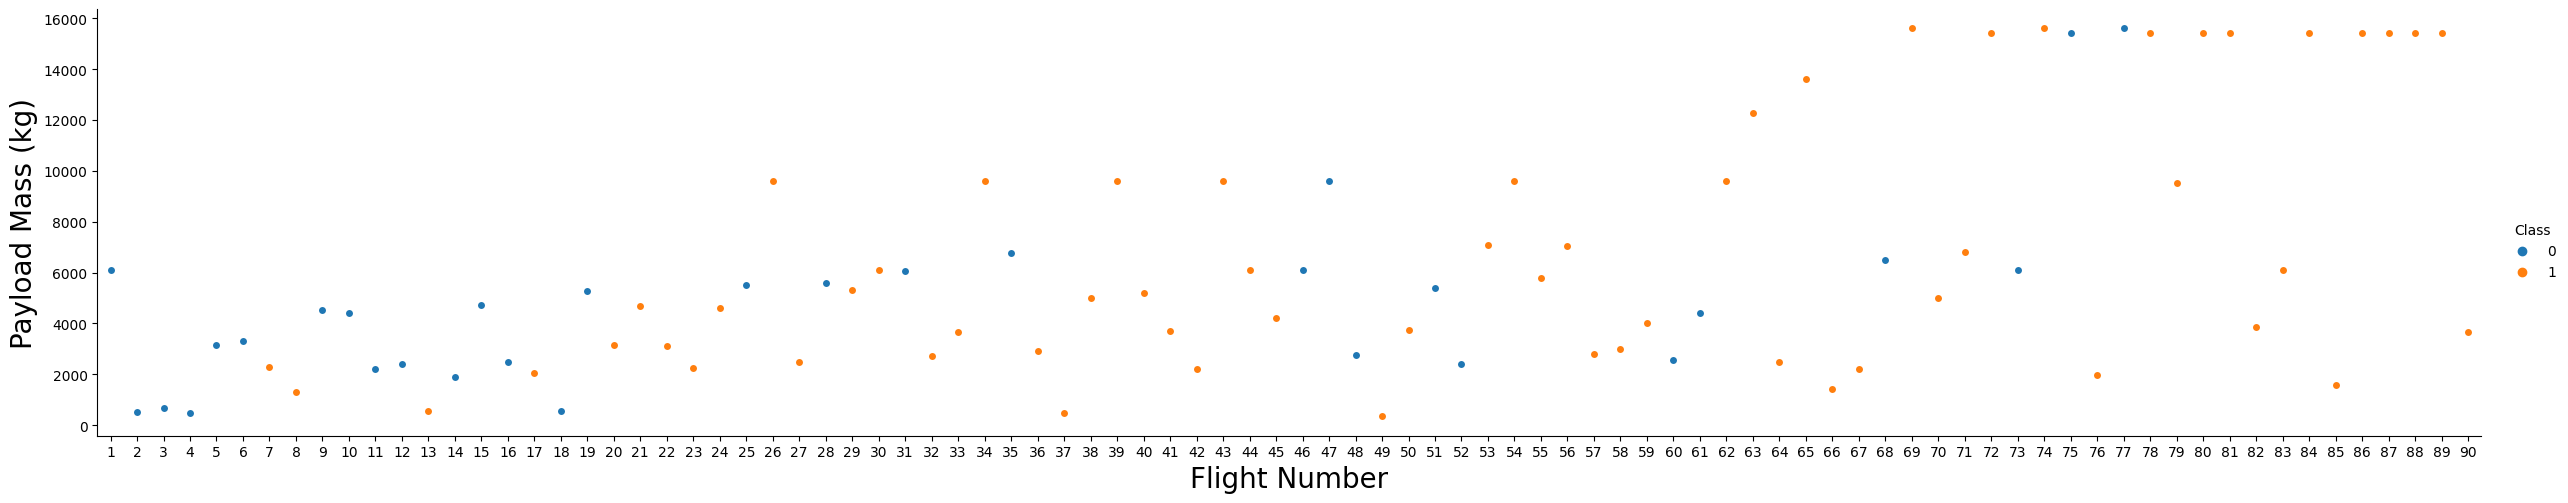

In [3]:
sns.catplot(data=df, x='FlightNumber', y='PayloadMass', hue='Class', aspect=5)
plt.xlabel('Flight Number', fontsize=20)
plt.ylabel('Payload Mass (kg)', fontsize=20)
plt.show()

In [4]:
# Success Rate:

df.groupby('LaunchSite')['Class'].mean()

# df.groupby('LaunchSite')['Class'].sum() / df.groupby('LaunchSite')['Class'].count()

LaunchSite
CCAFS SLC 40    0.600000
KSC LC 39A      0.772727
VAFB SLC 4E     0.769231
Name: Class, dtype: float64

We see that different launch sites have different success rates. `CCAFS LC-40` has a success rate of 60 %, while `KSC LC-39A` and `VAFB SLC 4E` has a success rate of 77%.

Next, let's drill down to each site visualize its detailed launch records.

**1. Visualize the relationship between Flight Number and Launch Site**

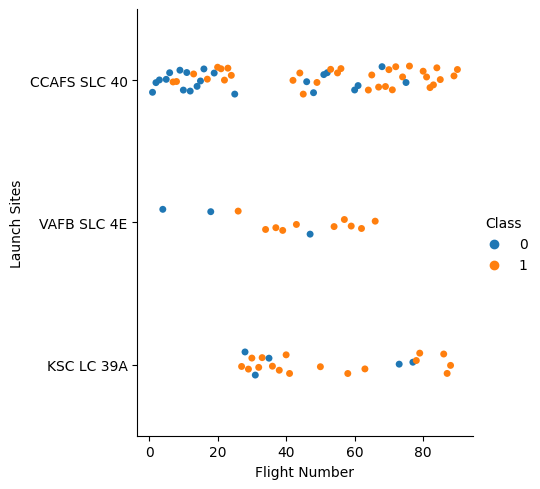

In [5]:
sns.catplot(data=df, x='FlightNumber', y='LaunchSite', hue='Class')
plt.xlabel('Flight Number')
plt.ylabel('Launch Sites')
plt.show()

It is evident that eventhough the beginning tests failed in all of the Launch Sites, the latest flights have been successful.

Eventhough `CCAFS SLC 40` has a success rate of 60%, it has shown more successes in the latest set of Flights, this is due to the fact that more number of Flights took place here.

**2. Visualize the relationship between Payload and Launch Site**

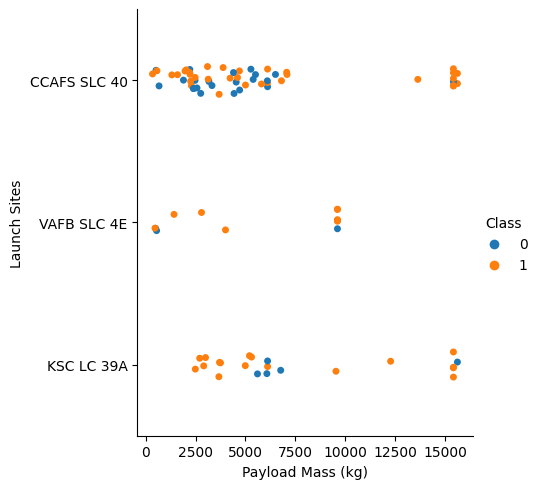

In [6]:
sns.catplot(data=df, x='PayloadMass', y='LaunchSite', hue='Class')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Launch Sites')
plt.show()

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC launchsite there are no rockets launched for heavypayload mass(greater than 10,000 kg).

**3. Visualize the relationship between success rate of each orbit type**

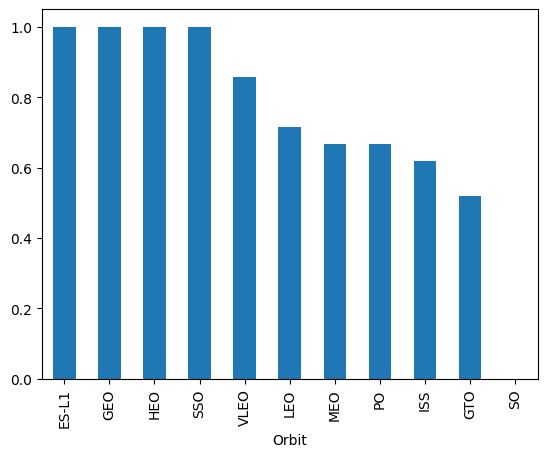

In [7]:
df.groupby('Orbit')['Class'].mean().sort_values(ascending=False).plot(kind='bar')
plt.show()

**4. Visualize the relationship between FlightNumber and Orbit type**

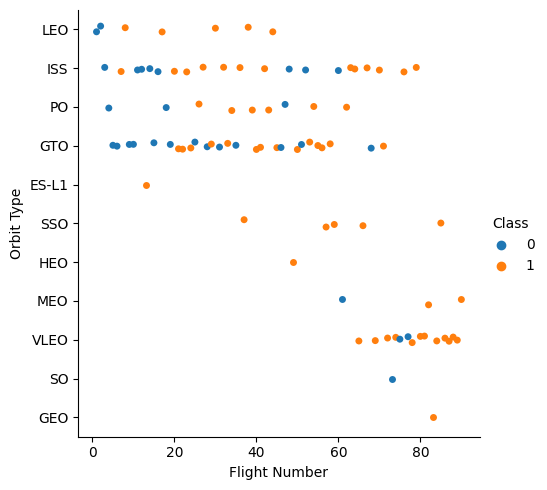

In [8]:
sns.catplot(data=df, x='FlightNumber', y='Orbit', hue='Class')
plt.xlabel('Flight Number')
plt.ylabel('Orbit Type')
plt.show()

You can see that in the `LEO` orbit the success appears related to the number of flights; on the other hand, there seems to be no relationship between `FlightNumber` when in `GTO` orbit.

**5. Visualize the relationship between Payload and Orbit type**

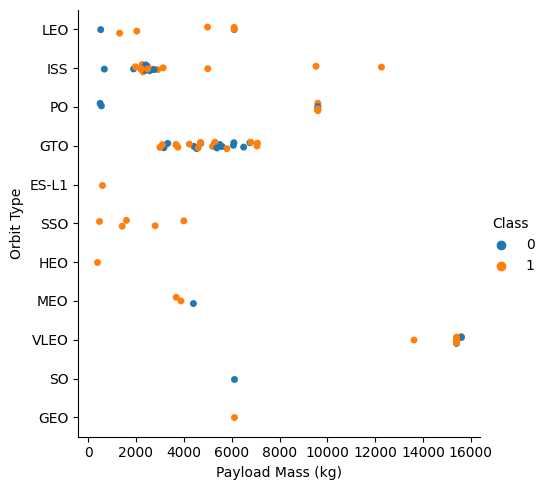

In [9]:
sns.catplot(data=df, x='PayloadMass', y='Orbit', hue='Class')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Orbit Type')
plt.show()

With heavy payloads the successful landing or positive landing rate are more for `Polar`, `LEO` and `ISS`.

However for `GTO` we cannot distinguish this well as both positive landing rate and negative landing (unsuccessful mission) are both there here.

**6. Visualize the launch success yearly trend**

In [10]:
# Function to extract years from the date
year = []
def extract_year(date):
  for date in df['Date']:
    year.append(date.split('-')[0])
  return year

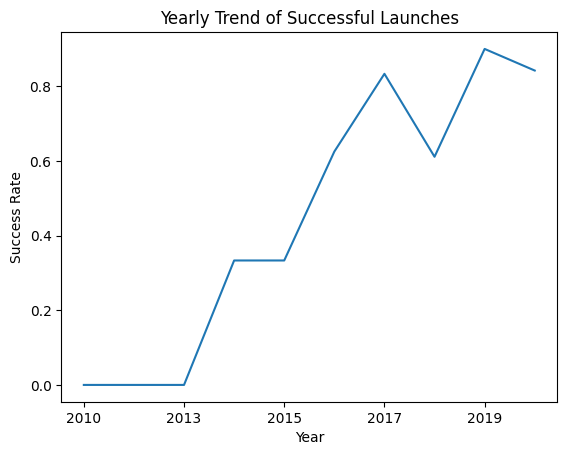

In [11]:
df.groupby(extract_year('Date'))['Class'].mean().plot(kind='line')
plt.title('Yearly Trend of Successful Launches')
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.show()

### Feature Engineering
By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.

In [12]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


**7. Create dummy variables to categorical columns**

In [13]:
features_one_hot = pd.get_dummies(features, ['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
features_one_hot = features_one_hot.astype('float')

In [15]:
features_one_hot.dtypes

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object

In [16]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

***